In [48]:
#Importación de librerías
import pandas as pd
import sqlite3 as sql #### para bases de datos sql
import a_funciones as funciones
import sys
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Ruta 
sys.path

['c:\\Users\\alejo\\Documents\\Materias UdeA\\2024-1\\Código\\Caso_ejemplo',
 'c:\\Users\\alejo\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip',
 'c:\\Users\\alejo\\AppData\\Local\\Programs\\Python\\Python311\\DLLs',
 'c:\\Users\\alejo\\AppData\\Local\\Programs\\Python\\Python311\\Lib',
 'c:\\Users\\alejo\\AppData\\Local\\Programs\\Python\\Python311',
 '',
 'C:\\Users\\alejo\\AppData\\Roaming\\Python\\Python311\\site-packages',
 'C:\\Users\\alejo\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32',
 'C:\\Users\\alejo\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib',
 'C:\\Users\\alejo\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin',
 'c:\\Users\\alejo\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages']

In [2]:
#Lectura de archivos
bd=pd.read_csv("rvm.csv")

C:\Users\alejo\AppData\Local\Temp\ipykernel_820\3816644531.py:2: DtypeWarning: Columns (0,1,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  bd=pd.read_csv("rvm.csv")


In [3]:
bd

,id,Fecha de Nacimiento,Edad,Genero,Dirección,UBICACION DEL PUNTO DE RECOLECCION,NUMERO DE VISITAS POR USUARIO,VOLUMEN GENERADO POR USUARIO (g),Unnamed: 8,Unnamed: 9
0,USK21705,3/5/1987 0:00,32.0,Mujer,carrera 51 aa 31 ae 10,Sin Interaccion,Sin Interaccion,Sin Interaccion,NaN,NaN
1,USK21704,10/26/1992 4:00,26.0,Mujer,calle 94 # 51b 15,Plaza Mayor,1,69,NaN,NaN
2,USK21703,12/27/1989 5:00,29.0,Hombre,carrera 45C #38B sur 10,Plaza Mayor,1,1,NaN,NaN
3,USK21702,3/12/2000 5:00,19.0,Mujer,Crr 48B # 106-49,Sin Interaccion,Sin Interaccion,Sin Interaccion,NaN,NaN
4,USK21701,1/31/1994 5:00,25.0,Mujer,carrera 36 36 # 65 dd 14,Coltejer,1,18,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
70804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Eliminar las dos últimas columnas vacías
bd = bd.iloc[:, :-2]

In [9]:
bd

,id,Fecha de Nacimiento,Edad,Genero,Dirección,UBICACION DEL PUNTO DE RECOLECCION,NUMERO DE VISITAS POR USUARIO,VOLUMEN GENERADO POR USUARIO (g)
0,USK21705,3/5/1987 0:00,32.0,Mujer,carrera 51 aa 31 ae 10,Sin Interaccion,Sin Interaccion,Sin Interaccion
1,USK21704,10/26/1992 4:00,26.0,Mujer,calle 94 # 51b 15,Plaza Mayor,1,69
2,USK21703,12/27/1989 5:00,29.0,Hombre,carrera 45C #38B sur 10,Plaza Mayor,1,1
3,USK21702,3/12/2000 5:00,19.0,Mujer,Crr 48B # 106-49,Sin Interaccion,Sin Interaccion,Sin Interaccion
4,USK21701,1/31/1994 5:00,25.0,Mujer,carrera 36 36 # 65 dd 14,Coltejer,1,18
...,...,...,...,...,...,...,...,...
70804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Eliminar los datos nulos
bd = bd.dropna()

In [11]:
bd

,id,Fecha de Nacimiento,Edad,Genero,Dirección,UBICACION DEL PUNTO DE RECOLECCION,NUMERO DE VISITAS POR USUARIO,VOLUMEN GENERADO POR USUARIO (g)
0,USK21705,3/5/1987 0:00,32.0,Mujer,carrera 51 aa 31 ae 10,Sin Interaccion,Sin Interaccion,Sin Interaccion
1,USK21704,10/26/1992 4:00,26.0,Mujer,calle 94 # 51b 15,Plaza Mayor,1,69
2,USK21703,12/27/1989 5:00,29.0,Hombre,carrera 45C #38B sur 10,Plaza Mayor,1,1
3,USK21702,3/12/2000 5:00,19.0,Mujer,Crr 48B # 106-49,Sin Interaccion,Sin Interaccion,Sin Interaccion
4,USK21701,1/31/1994 5:00,25.0,Mujer,carrera 36 36 # 65 dd 14,Coltejer,1,18
...,...,...,...,...,...,...,...,...
21471,USK234,1/2/1996 0:00,23.0,Hombre,Calle 47 # 72 b 46,"Aventura, Ruta N, Kaptadora 71, , Kaptadora 70",18,607
21494,USK211,6/6/2017 0:00,1.0,Hombre,"Campo Valdes, MedellÃ­n - Antioquia, Colombia",Sin Interaccion,Sin Interaccion,Sin Interaccion
21501,USK204,1/13/1972 0:00,47.0,Hombre,"La PiÃ±uela, MedellÃ­n - Antioquia, Colombia",", Aventura, Kaptadora 70, Ruta N",72,"4,775"
21513,USK192,4/10/1988 0:00,30.0,Mujer,Calle 101B 72 - 13,"Kaptadora 71, Ruta N, , Kaptadora 70",58,229


In [12]:
# Renombrar las columnas a nombres más simples y en minúsculas
nuevos_nombres = {
    "id": "id",
    "Fecha de Nacimiento": "fecha_nacimiento",
    "Edad": "edad",
    "Genero": "genero",
    "Dirección": "direccion",
    "UBICACION DEL PUNTO DE RECOLECCION": "ubicacion_recoleccion",
    "NUMERO DE VISITAS POR USUARIO": "visitas_usuario",
    "VOLUMEN GENERADO POR USUARIO (g)": "volumen_generado"
}
bd = bd.rename(columns=nuevos_nombres)
bd

,id,fecha_nacimiento,edad,genero,direccion,ubicacion_recoleccion,visitas_usuario,volumen_generado
0,USK21705,3/5/1987 0:00,32.0,Mujer,carrera 51 aa 31 ae 10,Sin Interaccion,Sin Interaccion,Sin Interaccion
1,USK21704,10/26/1992 4:00,26.0,Mujer,calle 94 # 51b 15,Plaza Mayor,1,69
2,USK21703,12/27/1989 5:00,29.0,Hombre,carrera 45C #38B sur 10,Plaza Mayor,1,1
3,USK21702,3/12/2000 5:00,19.0,Mujer,Crr 48B # 106-49,Sin Interaccion,Sin Interaccion,Sin Interaccion
4,USK21701,1/31/1994 5:00,25.0,Mujer,carrera 36 36 # 65 dd 14,Coltejer,1,18
...,...,...,...,...,...,...,...,...
21471,USK234,1/2/1996 0:00,23.0,Hombre,Calle 47 # 72 b 46,"Aventura, Ruta N, Kaptadora 71, , Kaptadora 70",18,607
21494,USK211,6/6/2017 0:00,1.0,Hombre,"Campo Valdes, MedellÃ­n - Antioquia, Colombia",Sin Interaccion,Sin Interaccion,Sin Interaccion
21501,USK204,1/13/1972 0:00,47.0,Hombre,"La PiÃ±uela, MedellÃ­n - Antioquia, Colombia",", Aventura, Kaptadora 70, Ruta N",72,"4,775"
21513,USK192,4/10/1988 0:00,30.0,Mujer,Calle 101B 72 - 13,"Kaptadora 71, Ruta N, , Kaptadora 70",58,229


In [13]:
# Eliminar las filas que contienen 'Sin Interaccion' en la columna 'visitas_usuario'
bd = bd[bd['visitas_usuario'] != 'Sin Interaccion']

# Reiniciar los índices después de eliminar las filas
bd = bd.reset_index(drop=True)
bd

,id,fecha_nacimiento,edad,genero,direccion,ubicacion_recoleccion,visitas_usuario,volumen_generado
0,USK21704,10/26/1992 4:00,26.0,Mujer,calle 94 # 51b 15,Plaza Mayor,1,69
1,USK21703,12/27/1989 5:00,29.0,Hombre,carrera 45C #38B sur 10,Plaza Mayor,1,1
2,USK21701,1/31/1994 5:00,25.0,Mujer,carrera 36 36 # 65 dd 14,Coltejer,1,18
3,USK21697,10/10/2041 5:00,23.0,Hombre,carreraa 40 # 78 - 66,Coltejer,2,27
4,USK21696,4/20/1949 5:00,69.0,Mujer,calle 72A #45-48,Ruta N,1,57
...,...,...,...,...,...,...,...,...
2806,USK360,3/24/1996 0:00,23.0,Mujer,Cra 39,"Kaptadora 70, Kaptadora 71, Ruta N",19,203
2807,USK234,1/2/1996 0:00,23.0,Hombre,Calle 47 # 72 b 46,"Aventura, Ruta N, Kaptadora 71, , Kaptadora 70",18,607
2808,USK204,1/13/1972 0:00,47.0,Hombre,"La PiÃ±uela, MedellÃ­n - Antioquia, Colombia",", Aventura, Kaptadora 70, Ruta N",72,"4,775"
2809,USK192,4/10/1988 0:00,30.0,Mujer,Calle 101B 72 - 13,"Kaptadora 71, Ruta N, , Kaptadora 70",58,229


In [14]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2811 non-null   object 
 1   fecha_nacimiento       2811 non-null   object 
 2   edad                   2811 non-null   float64
 3   genero                 2811 non-null   object 
 4   direccion              2811 non-null   object 
 5   ubicacion_recoleccion  2811 non-null   object 
 6   visitas_usuario        2811 non-null   object 
 7   volumen_generado       2811 non-null   object 
dtypes: float64(1), object(7)
memory usage: 175.8+ KB


In [16]:
# Convertir la columna de fecha a formato de fecha sin hora
bd['fecha_nacimiento'] = pd.to_datetime(bd['fecha_nacimiento'], errors='coerce', format='%m/%d/%Y %H:%M', infer_datetime_format=True)
bd['fecha_nacimiento'] = bd['fecha_nacimiento'].dt.date


C:\Users\alejo\AppData\Local\Temp\ipykernel_820\2709647846.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  bd['fecha_nacimiento'] = pd.to_datetime(bd['fecha_nacimiento'], errors='coerce', format='%m/%d/%Y %H:%M', infer_datetime_format=True)


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


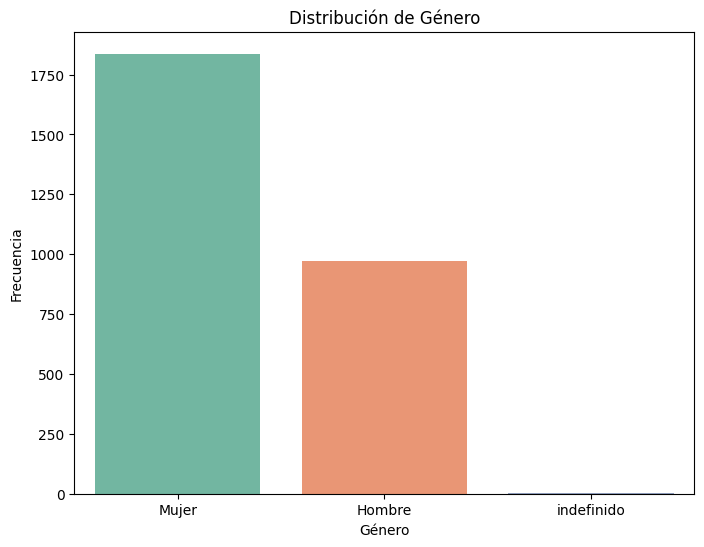

In [19]:
# Gráfico de barras para la variable 'genero'
plt.figure(figsize=(8, 6))
sns.countplot(data=bd, x='genero', palette='Set2')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


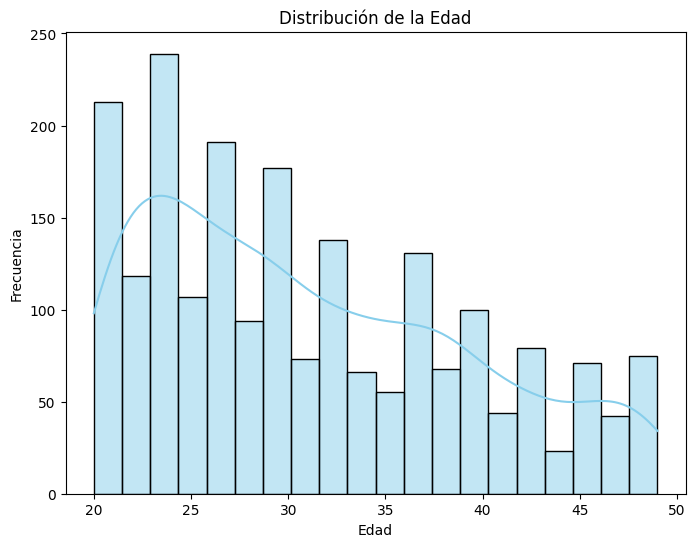

In [23]:
# Calcular el percentil 5 y el percentil 95 para la variable 'edad'
percentil_5 = bd['edad'].quantile(0.05)
percentil_95 = bd['edad'].quantile(0.95)

# Filtrar las filas que están dentro del rango de percentiles
bd = bd[(bd['edad'] >= percentil_5) & (bd['edad'] <= percentil_95)]

# Gráfico de histograma para la variable 'edad'
plt.figure(figsize=(8, 6))
sns.histplot(bd['edad'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [32]:
# Convertir la columna 'visitas_usuario' a tipo numérico
bd['visitas_usuario'] = pd.to_numeric(bd['visitas_usuario'], errors='coerce')

# Calcular el rango intercuartílico (IQR)
Q1 = bd['visitas_usuario'].quantile(0.25)
Q3 = bd['visitas_usuario'].quantile(0.75)
IQR = Q3 - Q1

# Definir el límite inferior y superior para identificar los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los valores atípicos
data_filtered = bd[(bd['visitas_usuario'] >= lower_bound) & (bd['visitas_usuario'] <= upper_bound)]

# Convertir la columna 'volumen_generado' a tipo numérico
bd['volumen_generado'] = pd.to_numeric(bd['volumen_generado'], errors='coerce')

# Calcular el rango intercuartílico (IQR)
Q1 = bd['volumen_generado'].quantile(0.25)
Q3 = bd['volumen_generado'].quantile(0.75)
IQR = Q3 - Q1

# Definir el límite inferior y superior para identificar los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los valores atípicos
data_filtered = bd[(bd['volumen_generado'] >= lower_bound) & (bd['volumen_generado'] <= upper_bound)]



In [38]:
bd.to_csv("bd_modificado.csv", index=False)

In [39]:
bd2 = pd.read_csv('bd_modificado.csv')

In [40]:
bd2

,id,fecha_nacimiento,edad,genero,direccion,ubicacion_recoleccion,visitas_usuario,volumen_generado
0,USK21704,1992-10-26,26.0,Mujer,calle 94 # 51b 15,Plaza Mayor,1,69.0
1,USK21703,1989-12-27,29.0,Hombre,carrera 45C #38B sur 10,Plaza Mayor,1,1.0
2,USK21701,1994-01-31,25.0,Mujer,carrera 36 36 # 65 dd 14,Coltejer,1,18.0
3,USK21697,2041-10-10,23.0,Hombre,carreraa 40 # 78 - 66,Coltejer,2,27.0
4,USK21695,1997-12-04,21.0,Hombre,Cll 28sur # 43A-70,U. CES,1,1.0
...,...,...,...,...,...,...,...,...
2099,USK360,1996-03-24,23.0,Mujer,Cra 39,"Kaptadora 70, Kaptadora 71, Ruta N",19,203.0
2100,USK234,1996-01-02,23.0,Hombre,Calle 47 # 72 b 46,"Aventura, Ruta N, Kaptadora 71, , Kaptadora 70",18,607.0
2101,USK204,1972-01-13,47.0,Hombre,"La PiÃ±uela, MedellÃ­n - Antioquia, Colombia",", Aventura, Kaptadora 70, Ruta N",72,NaN
2102,USK192,1988-04-10,30.0,Mujer,Calle 101B 72 - 13,"Kaptadora 71, Ruta N, , Kaptadora 70",58,229.0


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


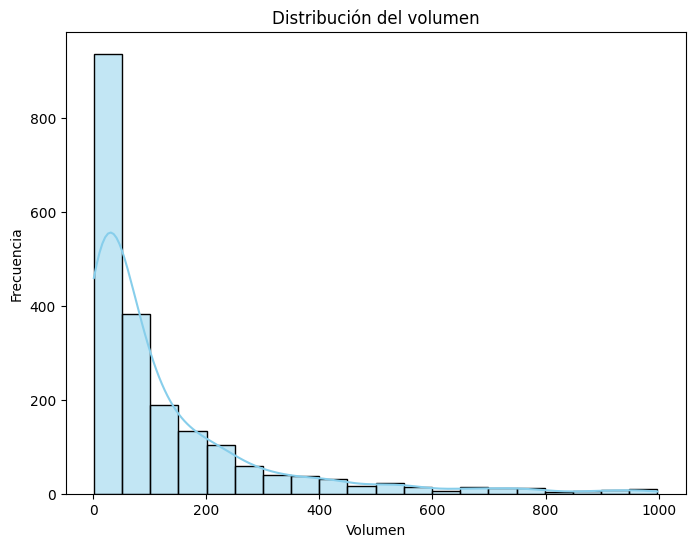

In [41]:
# Gráfico de histograma para la variable 'volumen generado'
plt.figure(figsize=(8, 6))
sns.histplot(bd2['volumen_generado'], bins=20, kde=True, color='skyblue')
plt.title('Distribución del volumen')
plt.xlabel('Volumen')
plt.ylabel('Frecuencia')
plt.show()

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


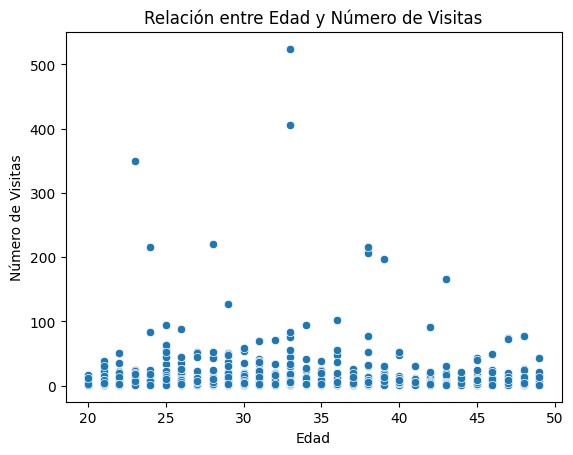

In [42]:
# Realizar un análisis exploratorio de datos (EDA)
# relación entre la edad y el número de visitas
sns.scatterplot(x='edad', y='visitas_usuario', data=bd2)
plt.title('Relación entre Edad y Número de Visitas')
plt.xlabel('Edad')
plt.ylabel('Número de Visitas')
plt.show()

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


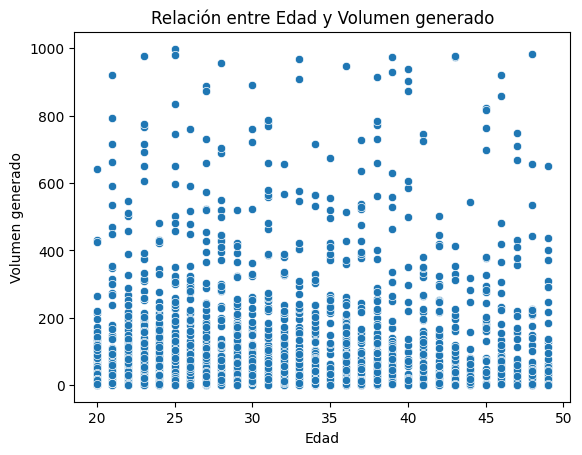

In [44]:
# Realizar un análisis exploratorio de datos (EDA)
# relación entre la edad y el volumen generado
sns.scatterplot(x='edad', y='volumen_generado', data=bd2)
plt.title('Relación entre Edad y Volumen generado')
plt.xlabel('Edad')
plt.ylabel('Volumen generado')
plt.show()

# Regresión lineal

In [46]:
# Seleccionar las variables relevantes
# En este ejemplo, seleccionaremos 'edad', 'genero' y 'ubicacion_recoleccion' como variables predictoras
X = bd2[['edad', 'genero', 'ubicacion_recoleccion']]
y = bd2['visitas_usuario']


In [53]:
# Codificar variables categóricas
X = pd.get_dummies(X, columns=['genero', 'ubicacion_recoleccion'], drop_first=True)

KeyError: "None of [Index(['genero', 'ubicacion_recoleccion'], dtype='object')] are in the [columns]"

In [49]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

In [50]:
# Evaluar el modelo
print('Error Cuadrático Medio (MSE):', mean_squared_error(y_test, y_pred))
print('Coeficiente de Determinación (R^2):', r2_score(y_test, y_pred))

# Interpretar los coeficientes del modelo
coeficientes = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_})
print(coeficientes)

Error Cuadrático Medio (MSE): 1.735867626173563e+23
Coeficiente de Determinación (R^2): -2.3569477907932057e+20
                                              Variable   Coeficiente
0                                                 edad  7.345997e-02
1                                         genero_Mujer -1.203788e+00
2                                    genero_indefinido -3.240122e+00
3    ubicacion_recoleccion_, Aventura, Kaptadora 70... -8.312847e+12
4                     ubicacion_recoleccion_, Coltejer -2.086279e+10
..                                                 ...           ...
236            ubicacion_recoleccion_Unicentro, Ruta N -2.086279e+10
237  ubicacion_recoleccion_Unicentro, Ruta N, Kapta... -2.086279e+10
238           ubicacion_recoleccion_Unicentro, Santafe -2.086279e+10
239  ubicacion_recoleccion_Unicentro, Terminal del ... -2.086279e+10
240            ubicacion_recoleccion_Unicentro, U. CES -2.086279e+10

[241 rows x 2 columns]


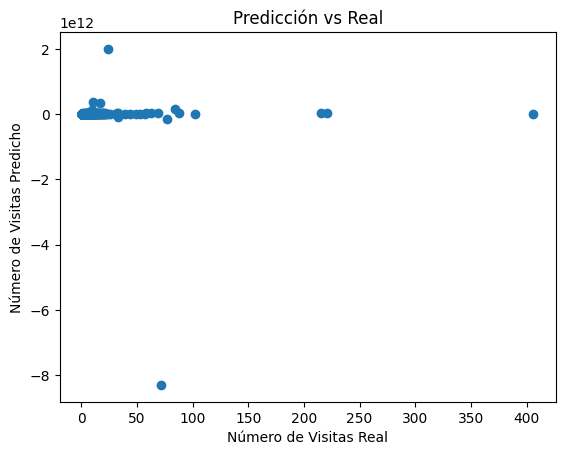

In [51]:
# Podemos visualizar la relación entre las visitas predichas y reales
plt.scatter(y_test, y_pred)
plt.xlabel('Número de Visitas Real')
plt.ylabel('Número de Visitas Predicho')
plt.title('Predicción vs Real')
plt.show()

# Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.get_dummies(bd2)
# Imputar valores faltantes con la media
data.fillna(data.mean(), inplace=True)


# Dividir los datos en características (X) y la variable objetivo (y)
X_2 = data.drop(columns=["visitas_usuario"])
y_2 = data["visitas_usuario"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Inicializar el modelo de Random Forest
random_forest = RandomForestRegressor(n_estimators=1000, random_state=42)

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de Determinación (R^2):", r2)

# Opcional: Visualizar la importancia de las características
feature_importances = pd.DataFrame(random_forest.feature_importances_, index=X_train.columns, columns=["Importance"])
print(feature_importances)

Error Cuadrático Medio (MSE): 590.2335512731592
Coeficiente de Determinación (R^2): 0.19858539686470034
                                                    Importance
edad                                                  0.007515
volumen_generado                                      0.127208
id_USK10009                                           0.000000
id_USK10050                                           0.000000
id_USK10060                                           0.000000
...                                                        ...
ubicacion_recoleccion_Unicentro, Ruta N               0.000002
ubicacion_recoleccion_Unicentro, Ruta N, Kaptad...    0.000007
ubicacion_recoleccion_Unicentro, Santafe              0.000129
ubicacion_recoleccion_Unicentro, Terminal del N...    0.000002
ubicacion_recoleccion_Unicentro, U. CES               0.000002

[6312 rows x 1 columns]


In [74]:
# Dividir los datos en características (X) y la variable objetivo (y)
X_3 = data.drop(columns=["visitas_usuario"])
y_3 = data["visitas_usuario"]

# Inicializar el modelo de Random Forest
random_forest = RandomForestRegressor(n_estimators=1000, random_state=42)

# Entrenar el modelo
random_forest.fit(X_3, y_3)

# Predecir el número de visitas mensuales para cada persona en la base de datos
data["visitas_predichas"] = random_forest.predict(X_3)

In [77]:
columnas_ubicaciones = [col for col in data.columns if 'ubicacion_recoleccion' in col]

# Calcular el promedio de visitas mensuales predichas para cada ubicación en el DataFrame
ubicaciones_promedio = data[columnas_ubicaciones].mean().reset_index()
ubicaciones_promedio.columns = ['ubicacion_recoleccion', 'visitas_predichas']

# Seleccionar las tres ubicaciones con los valores de predicción más altos
sitios_potenciales = ubicaciones_promedio.nlargest(3, "visitas_predichas")

print("Sitios potenciales recomendados para ubicar nuevas máquinas expendedoras:")
print(sitios_potenciales)

Sitios potenciales recomendados para ubicar nuevas máquinas expendedoras:
              ubicacion_recoleccion  visitas_predichas
55   ubicacion_recoleccion_Coltejer           0.231939
152    ubicacion_recoleccion_Ruta N           0.199620
217    ubicacion_recoleccion_U. CES           0.073669
